# DAT158 - TMBD Box Office Prediction 

In [1018]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Frame the problem and look at the big picture

I dette maskinlæringsprosjektet skal vi vi utvikle og trene en modell til å beregne inntekter til filmer. Notebooken vår er strukturert etter disse syv punktene:

1. Frame the problem and look at the big picture
2. Get the data
3. Explore the data to gain insights
4. Prepare the data to better expose the underlying data patterns to machine learning algorithms
5. Explore many different models and short-list the best ones
6. Fine-tune your models and combine them into a great solution
7. Final model and launch

## Get the data

Importerer nødvendige bibliotek

In [1019]:
# Libraries

import numpy as np
import pandas as pd
pd.set_option('max_columns', None)
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

Kobler opp train og test datasettene. 

Usikker på hva det andre gjør, kopierte fra https://www.kaggle.com/artgor/eda-feature-engineering-and-model-interpretation. Måtte gjøre det for at visse ting skulle fungere.


In [1020]:
train=pd.read_csv('drive/MyDrive/Skole/HVL/ML2/data/train.csv')
test=pd.read_csv('drive/MyDrive/Skole/HVL/ML2/data/test.csv')
#sampleSubmission=pd.read_csv('drive/MyDrive/Skole/HVL/ML2/data/sample_submission.csv')

test_id = test['id'].copy()

## Explore the data to gain insights

### Basic insight

Vi starter med å gjøre attributtene om fra JSON til ... 


In [1021]:
dict_columns = ['belongs_to_collection', 'genres', 'production_companies',
                'production_countries', 'spoken_languages', 'Keywords', 'cast', 'crew']

def text_to_dict(df):
    for column in dict_columns:
        df[column] = df[column].apply(lambda x: {} if pd.isna(x) else ast.literal_eval(x) )
    return df
        
train = text_to_dict(train)
test = text_to_dict(test)

train.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,{},3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,{},1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,{},"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,{},0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,{},"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,{},"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


Vi ønsker å få en bra oversikt over datasettene. Vi kommer til å trenge mange operasjoner for å få denne oversikten. Vi begynner beskjedent med ".info()" for å få en innsikt i hvor mange og hvilke kolonner vi har, og hvor mange non-null elementer og hvilken datatype som er i hver kolonne. 

In [1022]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  3000 non-null   object 
 2   budget                 3000 non-null   int64  
 3   genres                 3000 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   3000 non-null   object 
 12  production_countries   3000 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

In [1023]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     4398 non-null   int64  
 1   belongs_to_collection  4398 non-null   object 
 2   budget                 4398 non-null   int64  
 3   genres                 4398 non-null   object 
 4   homepage               1420 non-null   object 
 5   imdb_id                4398 non-null   object 
 6   original_language      4398 non-null   object 
 7   original_title         4398 non-null   object 
 8   overview               4384 non-null   object 
 9   popularity             4398 non-null   float64
 10  poster_path            4397 non-null   object 
 11  production_companies   4398 non-null   object 
 12  production_countries   4398 non-null   object 
 13  release_date           4397 non-null   object 
 14  runtime                4394 non-null   float64
 15  spok

Vi legger merke til at "test" mangler en kolonne sammenlignet med "train". Kolonnen som mangler er "revenue". Det er denne kolonnen vår maskinlæremodell skal bergene og fylle ut.

Videre ønsker vi å få en tydelig sammenliging av datasettene sine antall rader og kolonner.

In [1024]:
train.shape, test.shape

((3000, 23), (4398, 22))

Etter vi har fått oversikt over alle kolonnene i datasettet har vi valgt å dykke dypere inn i visse attributter vi tror har større påvirkningskraft på inntektene til en film. De vi har valgt å utforske videre er belongs_to_collection, budget, genres, production_companies, production_contries og cast. 

Vi tror i tillegg at popularity, runtime og orginal_languages også vil påvirke inntekene mer enn de resterende attributtene, men vi har valgt å ikke utforske de mer. 

### Belongs to collection

Noen filmer tilhører en samling av filmer. Vi ønsker å finne ut hvor mange av filmene i datasettet som tilhører en samling og hvor mange som ikke gjør det. Denne infoen kan bli brukt senere som en **komponent/attributt/del** til å beregne inntekten til en film.

In [1025]:
train['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0).value_counts()

0    2396
1     604
Name: belongs_to_collection, dtype: int64

Det kan være vanskelig å håndtere data når de er lagret i objekter. Vi vil heller ha numeriske attributter. Vi lager to nye kolonner, collection_name og has_collection. Collection_name skal inneholde navnet til samlingen hvis filmen er en del av en samling. Has_collection skal innholde 1 eller 0, utfra om filmen er en del av en samling eller ikke. 

In [1026]:
train['collection_name'] = train['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != {} else 0)
train['has_collection'] = train['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0)

test['collection_name'] = test['belongs_to_collection'].apply(lambda x: x[0]['name'] if x != {} else 0)
test['has_collection'] = test['belongs_to_collection'].apply(lambda x: len(x) if x != {} else 0)

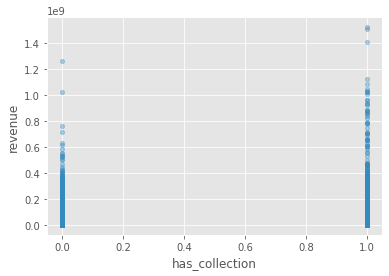

In [1027]:
train.plot(kind="scatter", x="has_collection", y="revenue", alpha=0.4)

Vi ser at filmer som er en del av en samling tjener betydelig mer enn filmer som ikke er en del av en samling.

### Budget

Budsjettet til en film har betydning på inntekten, utfra at filmer alltid ønsker å gå i overskudd. Vi vil derfor få innsikt denne kolonnen

In [1028]:
train.budget[:10]

0    14000000
1    40000000
2     3300000
3     1200000
4           0
5     8000000
6    14000000
7           0
8           0
9     6000000
Name: budget, dtype: int64

Som vi ser over, så har flere filmer 0 i budsjett. Vi antar at grunnen til dette er mangel på data. Vi kommer derfor til å fikse dette under punkt 4.

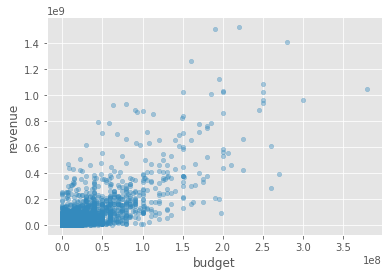

In [1029]:
train.plot(kind="scatter", x="budget", y="revenue", alpha=0.4)

Figuren over viser at i de fleste tilfeller er det en sammenheng mellom budsjett og inntekt.

### Genres

In [1030]:
for i, e in enumerate(train['genres'][:5]):
    print(i, e)

0 [{'id': 35, 'name': 'Comedy'}]
1 [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10751, 'name': 'Family'}, {'id': 10749, 'name': 'Romance'}]
2 [{'id': 18, 'name': 'Drama'}]
3 [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'name': 'Drama'}]
4 [{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}]


Filmer kan inngå i flere sjangere. Antall sjangere en film har kan ha en sammenheng i hvor suksessfull den blir. Denne informasjonen kan også bli brukt til å beregne en films inntekt. Vi skriver derfor ut hvor mange filmer som har et gitt antall sjangere.

In [1031]:
print('Number of genres in films')
train['genres'].apply(lambda x: len(x) if x != {} else 0).value_counts()

Number of genres in films


2    972
3    900
1    593
4    393
5    111
6     21
0      7
7      3
Name: genres, dtype: int64

Dataen over viser at de fleste filmer har 2 eller 3 sjangere, og at det er svært få filmer som har 0, 6 eller 7 sjangere. 

Videre er vi nysgjerrige på sammenhengen mellom antall sjangere og inntekten.

In [1032]:
train['films_in_number_of_genres'] = train['genres'].apply(lambda x: len(x) if x != {} else 0).value_counts()

test['films_in_number_of_genres'] = test['genres'].apply(lambda x: len(x) if x != {} else 0).value_counts()

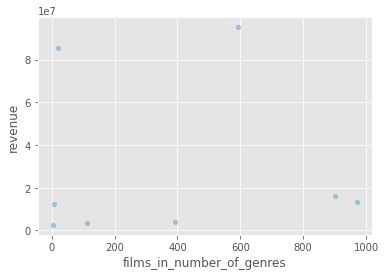

In [1033]:
train.plot(kind="scatter", x="films_in_number_of_genres", y="revenue", alpha=0.4)

De to prikkene lengst til høyre representerer 2 og 3 sjangere pr film, mens prikken på 600 på x-asken representerer 1 sjanger pr film. Utfra figueren ser vi at 2 og 3 sjangere pr film har en høyere inntekt enn de fleste andre, men 1 sjanger pr film er overlegen mtp inntekt.

Det vil være nyttig å vite hvor mange og hvilke sjangere vi har å jobbe med, og hvor mange filmer som inngår i hver av sjangerene. 

Vi begynner med å lagre sjangerne til hver film, for deretter å telle hvor mange filmer som inngår i hver sjanger. Til slutt visualiserer vi dataen slik at vi ser alle sjangerne og hvor populær hver sjanger er.

In [1034]:
genres_per = train['genres'].apply(lambda x: [i['name'] for i in x] if x != {} else [])
genres_per

0                                 [Comedy]
1         [Comedy, Drama, Family, Romance]
2                                  [Drama]
3                        [Thriller, Drama]
4                       [Action, Thriller]
                       ...                
2995                     [Comedy, Romance]
2996                        [Drama, Music]
2997    [Crime, Action, Mystery, Thriller]
2998                     [Comedy, Romance]
2999           [Thriller, Action, Mystery]
Name: genres, Length: 3000, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



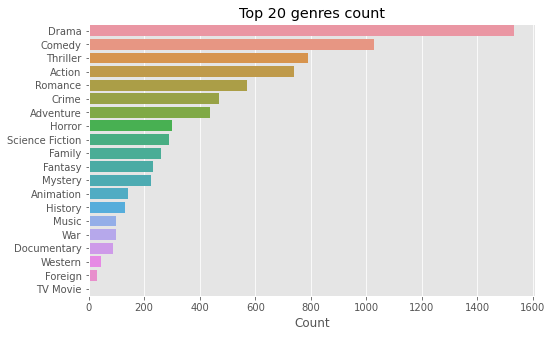

In [1035]:
genres_count = Counter([i for j in genres_per for i in j]).most_common()
fig = plt.figure(figsize=(8, 5))
sns.barplot([val[1] for val in genres_count], [val[0] for val in genres_count])
plt.xlabel('Count')
plt.title('Top 20 genres count')
plt.show()

### Popularity

Vi vil sjekke hvordan popularity påvirker inntekten.

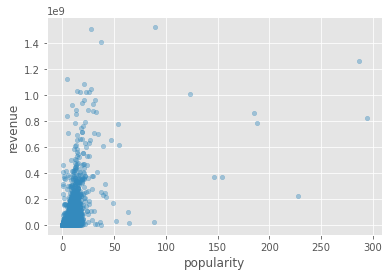

In [1036]:
train.plot(kind="scatter", x="popularity", y="revenue", alpha=0.4)

Det ser ikke ut som popularity har stor innvirkning på inntekten til en film.

### Production companies 

Vi skal nå se på produksjonsselskaper. Vi begynner med å få en oversikt over antall produksjonsselskaper hver film har.

In [1037]:
print('Number of production companies in films')
train['production_companies'].apply(lambda x: len(x) if x != {} else 0).value_counts()

Number of production companies in films


1     775
2     734
3     582
4     312
5     166
0     156
6     118
7      62
8      42
9      29
11      7
10      7
12      3
16      2
15      2
14      1
13      1
17      1
Name: production_companies, dtype: int64

Dataen viser at de fleste filmer har 1-3 produksjonsselskaper, og at noen filmer har 0 eller 4-6 produksjonsselskaper.

Det kan være nyttig å vite hvilke produksjonsselskaper som ofte går igjen og hvor mange filmer de har i datasettet. Vi er usikre på hvordan vi skal bruke denne dataen videre, men vi tenker at det uansett er kjekt å bli kjent med dataen

In [1038]:
list_of_companies = list(train['production_companies'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)

Counter([i for j in list_of_companies for i in j]).most_common(30)

[('Warner Bros.', 202),
 ('Universal Pictures', 188),
 ('Paramount Pictures', 161),
 ('Twentieth Century Fox Film Corporation', 138),
 ('Columbia Pictures', 91),
 ('Metro-Goldwyn-Mayer (MGM)', 84),
 ('New Line Cinema', 75),
 ('Touchstone Pictures', 63),
 ('Walt Disney Pictures', 62),
 ('Columbia Pictures Corporation', 61),
 ('TriStar Pictures', 53),
 ('Relativity Media', 48),
 ('Canal+', 46),
 ('United Artists', 44),
 ('Miramax Films', 40),
 ('Village Roadshow Pictures', 36),
 ('Regency Enterprises', 31),
 ('BBC Films', 30),
 ('Dune Entertainment', 30),
 ('Working Title Films', 30),
 ('Fox Searchlight Pictures', 29),
 ('StudioCanal', 28),
 ('Lionsgate', 28),
 ('DreamWorks SKG', 27),
 ('Fox 2000 Pictures', 25),
 ('Summit Entertainment', 24),
 ('Hollywood Pictures', 24),
 ('Orion Pictures', 24),
 ('Amblin Entertainment', 23),
 ('Dimension Films', 23)]

In [1039]:
train['films_in_number_of_companies'] = train['production_companies'].apply(lambda x: len(x) if x != {} else 0).value_counts()

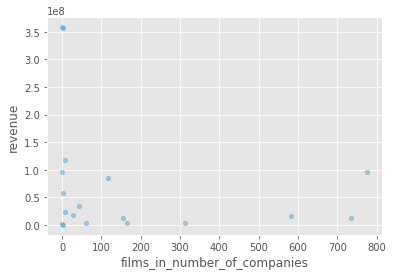

In [1040]:
train.plot(kind="scatter", x="films_in_number_of_companies", y="revenue", alpha=0.4)

De fire første prikkene fra høyre viser inntekten til filmer med ett, to, tre og fire produksjonsselskap i samme film. Filmene med ett produksjonsselskap ser ut til å ha høyere inntekter enn de med flere. Det ser ikke ut til å være en sammenheng mellom om en film har to eller flere produksjonsselskaper og inntekten.

### Production countries

En annen **komponent** som kan indirekte påvirke inntekten til en film er i hvilke(t) land filmen er produsert i. 

Igjen begynner vi med å få en oversikt over hvor mange land filmen er produsert i.

In [1041]:
print('Number of production countries in films')
train['production_countries'].apply(lambda x: len(x) if x != {} else 0).value_counts()

Number of production countries in films


1    2222
2     525
3     116
4      57
0      55
5      21
6       3
8       1
Name: production_countries, dtype: int64

Som vi ser så blir de fleste filmene produsert i ett land, men det er god del som også blir produsert i to land.

Vi ønsker også å få en oversikt over hvilke land som har vært med å produsere filmene, samt hvor mange filmer som har blitt produsert i hvert land. Vi gjør det samme som vi gjorde med sjangere for å visualisere dataen

In [1042]:
list_of_countries = list(train['production_countries'].apply(lambda x: [i['name'] for i in x] if x != {} else []).values)

In [1043]:
production_countries_per = train['production_countries'].apply(lambda x: [i['name'] for i in x] if x != {} else [])
production_countries_per

0       [United States of America]
1       [United States of America]
2       [United States of America]
3                          [India]
4                    [South Korea]
                   ...            
2995    [United States of America]
2996             [Denmark, Sweden]
2997    [United States of America]
2998    [United States of America]
2999    [United States of America]
Name: production_countries, Length: 3000, dtype: object

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



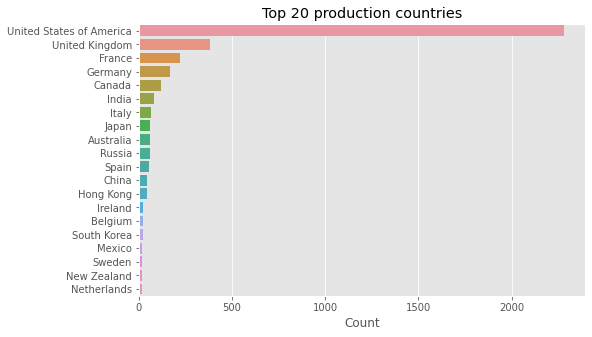

In [1044]:
production_countries_count = Counter([i for j in production_countries_per for i in j]).most_common(20)
fig = plt.figure(figsize=(8, 5))
sns.barplot([val[1] for val in production_countries_count], [val[0] for val in production_countries_count])
plt.xlabel('Count')
plt.title('Top 20 production countries')
plt.show()

In [1045]:
train['number_of_films_in_countries'] = train['production_countries'].apply(lambda x: len(x) if x != {} else 0).value_counts()

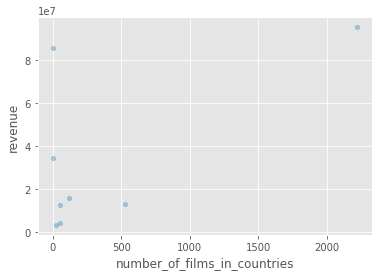

In [1046]:
train.plot(kind="scatter", x="number_of_films_in_countries", y="revenue", alpha=0.4)

Figuren over viser at filmer som er laget i USA generelt tjener mye mer enn resterende. Vi ser også at det er et annet land som også tjener fra på sine filmer, men det landet produserer veldig få filmer, så vi går ikke mer i dybden på det.

### Runtime

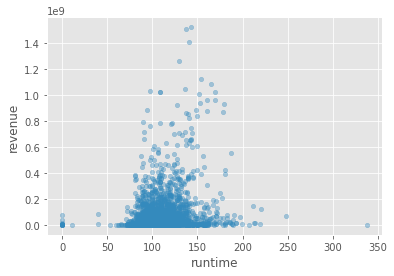

In [1047]:
train.plot(kind="scatter", x="runtime", y="revenue", alpha=0.4)

Over sammenligner vi runtime oppmot revenue, og ser at filmene som tjener mest varer som regel mellom 90-150 minutter

### Cast

In [1048]:
print('Amount of casted persons in films')
train['cast'].apply(lambda x: len(x) if x != {} else 0).value_counts().head(10)

Amount of casted persons in films


15    212
16    165
10    135
13    129
12    124
11    122
9     118
17    118
18    115
14    110
Name: cast, dtype: int64

Dataen over viser at de fleste filmene har mellom 9-18 personer i casten. Antall personer i casten kan ha noe å si på kvaliteten til filmen, som igjen kan påvirke inntektene. 

## Prepare the data to better expose the underlying data patterns to machine learning algorithms

Vi ønsker å gjøre endringer på noen deler av dataen fra datasettet. Det kan være vanskelig å jobbe med objekter, derfor skal vi gjøre om flere av kolonnene til å inneholde nummeriske attributter istedenfor objekter.

I tillegg er det mange kolonner som har liten innvirkning på inntekten. Vi tenker å fjerne disse kolonnene.

### Fjerne unødvendige kolonner

In [1049]:
train = train.drop(['id', 'homepage', 'imdb_id', 'original_title', 'overview', 'poster_path', 'production_companies', 'production_countries',
                    'release_date', 'spoken_languages', 'status', 'tagline', 'title', 'Keywords', 'films_in_number_of_genres',
                    'films_in_number_of_companies', 'number_of_films_in_countries'], axis=1)

test = test.drop(['id', 'homepage', 'imdb_id', 'original_title', 'overview', 'poster_path', 'production_companies', 'production_countries',
                  'release_date', 'spoken_languages', 'status', 'tagline', 'title', 'Keywords'], axis=1)

In [1050]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   belongs_to_collection  3000 non-null   object 
 1   budget                 3000 non-null   int64  
 2   genres                 3000 non-null   object 
 3   original_language      3000 non-null   object 
 4   popularity             3000 non-null   float64
 5   runtime                2998 non-null   float64
 6   cast                   3000 non-null   object 
 7   crew                   3000 non-null   object 
 8   revenue                3000 non-null   int64  
 9   collection_name        3000 non-null   object 
 10  has_collection         3000 non-null   int64  
dtypes: float64(2), int64(3), object(6)
memory usage: 257.9+ KB


### Belongs to collection

Siden vi la til to nye kolonner tidligere i prosjektet som skulle erstatte belongs_to_collection, så sletter vi nå belongs_to_collection. 

In [1051]:
train = train.drop(['belongs_to_collection'], axis=1)
train = train.drop(['collection_name'], axis=1)

test = test.drop(['belongs_to_collection'], axis=1)
test = test.drop(['collection_name'], axis=1)

### Genres

Vi ønsker å gjøre genres om til number_of_genres for å lagre antall sjangere hver film har.

In [1052]:
train['number_of_genres'] = train['genres'].apply(lambda x: len(x) if x != {} else 0)
test['number_of_genres'] = test['genres'].apply(lambda x: len(x) if x != {} else 0)

train = train.drop(['genres'], axis=1)
test = test.drop(['genres'], axis=1)

### Original language

Vi tror at orginalspråket til en film kan ha mye å si for inntekten. Vi tror at filmer som snakker engelsk generelt har en høyere inntekt enn filmer som ikke snakker engelsk, siden engelsk talende filmer når ut til flere. Vi skal derfor endre original_language til speaks_english. Speaks_english skal inneholde 0 eller 1 utfra om orginalspråket er engelsk eller ikke.

In [1053]:
train['speaks_english'] = train['original_language'].apply(lambda x: 1 if x == "en" else 0)
test['speaks_english'] = test['original_language'].apply(lambda x: 1 if x == "en" else 0)

train = train.drop(['original_language'], axis=1)
test = test.drop(['original_language'], axis=1)

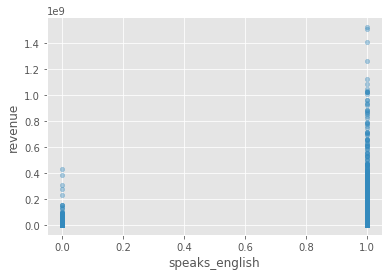

In [1054]:
train.plot(kind="scatter", x="speaks_english", y="revenue", alpha=0.4)

Som vi ser så har filmer med orginalspråk engelsk en betydelig høyere inntekt enn de som ikke snakker engelsk. 

### Production countries

Etter at vi så på dataen til production countries 

In [1055]:
#train['made_in_us'] = train['production_countries'].apply(lambda x: 1 if "US" in next(iter('iso_3166_1')) else 0)
#train['made_in_us'] = train['production_countries'].apply(lambda x: 1 if "US" in 'iso_3166_1' else 0)
#train['made_in_us'] = train['production_countries'].apply(lambda x: 1 if x['name'] == "United States of America" else 0)

#genres_per = train['genres'].apply(lambda x: [i['name'] for i in x] if x != {} else [])

#def is_US(a):
#    if "US" in a:
#        return 1
#    else: return 0

#train["made_in_us"] = train["production_countries"].apply(lambda x: 0 if x is np.nan else is_US(x))

#train['made_in_us']
#train['production_countries']

### Runtime

Det mangler to non-null verdier i runtime. Det skal vi ordne opp i nå

In [1056]:
medianTrain = train["runtime"].median()
train["runtime"].fillna(medianTrain, inplace=True)

medianTest = test["runtime"].median()
test["runtime"].fillna(medianTest, inplace=True)

### Cast 

Istedenfor å ha lagret hele casten ønsker vi å lagre antallet som er med i casten. Det vil bli mye lettere å håndtere et spesifikt antall enn et objekt.

In [1057]:
train['cast_count'] = train['cast'].apply(lambda x: 0 if x is np.nan else len(x))
test['cast_count'] = test['cast'].apply(lambda x: 0 if x is np.nan else len(x))

train = train.drop(['cast'], axis=1)
test = test.drop(['cast'], axis=1)

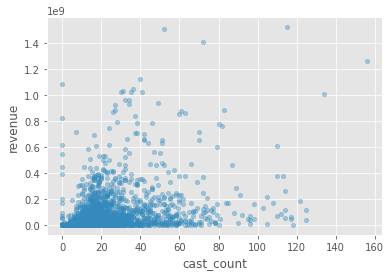

In [1058]:
train.plot(kind="scatter", x="cast_count", y="revenue", alpha=0.4)

### Crew

Istedenfor å ha lagret hele crewet \ ønsker vi å lagre antallet som er med i crewet. Det vil bli mye lettere å håndtere et spesifikt antall enn et objekt.

In [1059]:
train['crew_count'] = train['crew'].apply(lambda x: 0 if x is np.nan else len(x))
test['crew_count'] = test['crew'].apply(lambda x: 0 if x is np.nan else len(x))

train = train.drop(['crew'], axis=1)
test = test.drop(['crew'], axis=1)

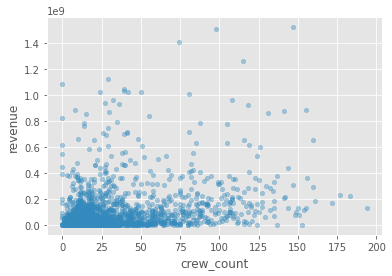

In [1060]:
train.plot(kind="scatter", x="crew_count", y="revenue", alpha=0.4)

In [1061]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   budget            3000 non-null   int64  
 1   popularity        3000 non-null   float64
 2   runtime           3000 non-null   float64
 3   revenue           3000 non-null   int64  
 4   has_collection    3000 non-null   int64  
 5   number_of_genres  3000 non-null   int64  
 6   speaks_english    3000 non-null   int64  
 7   cast_count        3000 non-null   int64  
 8   crew_count        3000 non-null   int64  
dtypes: float64(2), int64(7)
memory usage: 211.1 KB


### Korrelasjon

In [1062]:
corr_matrix = train.corr()
corr_matrix["revenue"].sort_values(ascending=False)

revenue             1.000000
budget              0.752965
popularity          0.461460
crew_count          0.372110
has_collection      0.339425
cast_count          0.335737
runtime             0.216417
number_of_genres    0.163654
speaks_english      0.142130
Name: revenue, dtype: float64

In [1063]:
revenue = train['revenue'].copy()
train = train.drop(['revenue'], axis=1)

### Transformation pipelines

In [1064]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy="median")),
        ('std_scaler', StandardScaler()),
    ])

In [1065]:
from sklearn.compose import ColumnTransformer 
from sklearn.preprocessing import OneHotEncoder
num_attribs = list(train)
full_pipeline = ColumnTransformer([
        ("num", num_pipeline, num_attribs),
    ])
train_tr = full_pipeline.fit_transform(train)
test_tr = full_pipeline.transform(test)

/usr/local/lib/python3.7/dist-packages/sklearn/compose/_column_transformer.py:430: FutureWarning:

Given feature/column names or counts do not match the ones for the data given during fit. This will fail from v0.24.



In [1066]:
train_tr.shape, test_tr.shape

((3000, 8), (4398, 8))

## Explore many different models and short-list the best ones

### Linear Regression

In [1067]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(train_tr, revenue)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1068]:
from sklearn.metrics import mean_squared_error
train_predictions = lin_reg.predict(train_tr)
lin_mse = mean_squared_error(revenue, train_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

82065955.48399836

82.965.955 er en alt for dårlig score. Vi prøver neste modell!

### Decision Tree Regressor

In [1069]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_tr, revenue)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [1070]:
train_predictions = tree_reg.predict(train_tr)
tree_mse = mean_squared_error(revenue, train_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

Her ser vi at modellen har blit overfitted.

In [1071]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(tree_reg, train_tr, revenue, scoring="neg_mean_squared_error", cv=10)
tree_rmse_scores = np.sqrt(-scores)

In [1072]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

display_scores(tree_rmse_scores)

Scores: [9.01413330e+07 9.54476863e+07 1.11839939e+08 1.04171098e+08
 1.00379976e+08 1.24242919e+08 1.18839316e+08 1.31494979e+08
 1.03254235e+08 1.11933027e+08]
Mean: 109174450.93771322
Standard deviation: 12334900.970875572


13.667.788 er en mye bedre score, men vi prøver en til modell! 

### Random Forest Regressor

In [1073]:
from sklearn.ensemble import RandomForestRegressor

forest_reg = RandomForestRegressor()
forest_reg.fit(train_tr, revenue)

forest_mse= mean_squared_error(revenue, train_predictions)
forest_rmse = np.sqrt(forest_mse)

scores = cross_val_score(forest_reg, train_tr, revenue, scoring="neg_mean_squared_error", cv=10)
forest_rmse_scores = np.sqrt(-scores)

display_scores(forest_rmse_scores)

Scores: [69675649.6716535  73041228.96032201 91490374.9521018  79188150.12368415
 77822542.1583305  93824716.56074603 66791468.76503462 79352903.81118624
 81042114.077104   70167420.35534167]
Mean: 78239656.94355044
Standard deviation: 8516044.914165525


8.912.464 er er akseptabel score. Vi er fornøyde med modellen! 

## Fine-tune your models and combine them into a great solution

In [1074]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

param_distribs = {
        'n_estimators': randint(low=1, high=200),
        'max_features': randint(low=1, high=8),
        'n_jobs': [-1]
    }

forest_reg = RandomForestRegressor(random_state=69)

rnd_search = RandomizedSearchCV(
                forest_reg, 
                param_distributions=param_distribs,
                n_iter=10, 
                cv=5, 
                scoring='neg_mean_squared_error', 
                random_state=69
            )

rnd_search.fit(train_tr, revenue)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [1075]:
cvres = rnd_search.cv_results_
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

78877497.37028658 {'max_features': 7, 'n_estimators': 108, 'n_jobs': -1}
77622478.90926157 {'max_features': 3, 'n_estimators': 184, 'n_jobs': -1}
78323426.8347571 {'max_features': 5, 'n_estimators': 50, 'n_jobs': -1}
81756341.05642025 {'max_features': 7, 'n_estimators': 10, 'n_jobs': -1}
80078312.14287859 {'max_features': 1, 'n_estimators': 39, 'n_jobs': -1}
79714939.61268348 {'max_features': 1, 'n_estimators': 89, 'n_jobs': -1}
77659670.67363909 {'max_features': 5, 'n_estimators': 166, 'n_jobs': -1}
77732394.98208477 {'max_features': 3, 'n_estimators': 76, 'n_jobs': -1}
90281654.57467814 {'max_features': 6, 'n_estimators': 4, 'n_jobs': -1}
79709758.77536972 {'max_features': 1, 'n_estimators': 168, 'n_jobs': -1}


Vi ser at den beste kombinasjonen er max_feature = 3 og n_estimators = 184

In [1076]:
feature_importances = rnd_search.best_estimator_.feature_importances_
feature_importances

array([0.42182422, 0.23625189, 0.08780671, 0.06179077, 0.02942155,
       0.00311467, 0.08281946, 0.07697074])

In [1077]:
sorted(zip(feature_importances, num_attribs), reverse=True)


[(0.4218242176035753, 'budget'),
 (0.23625189431295252, 'popularity'),
 (0.0878067062101579, 'runtime'),
 (0.08281946008276815, 'cast_count'),
 (0.07697073558668618, 'crew_count'),
 (0.06179077154368339, 'has_collection'),
 (0.029421546377299334, 'number_of_genres'),
 (0.0031146682828771845, 'speaks_english')]

## Final model and launch

In [1078]:
final_model = rnd_search.best_estimator_
final_predictions =  final_model.predict(test_tr)

In [1079]:
submission = pd.DataFrame({
    'id': test_id,
    'revenue': final_predictions
})

In [1080]:
submission.head()

,id,revenue
0,3001,1.280002e+07
1,3002,2.711351e+06
2,3003,1.124804e+07
3,3004,5.386925e+07
4,3005,3.642868e+06


In [1081]:
submission.to_csv('drive/MyDrive/Skole/HVL/ML2/data/submission.csv', index=False)

In [1082]:
from joblib import dump
dump(final_model, 'drive/MyDrive/Skole/HVL/ML2/TMDB_BO.joblib', compress=6)

['drive/MyDrive/Skole/HVL/ML2/TMDB_BO.joblib']